In [1]:
import pandas as pd
import numpy as np
from utils.dates import create_cal_data
from utils.column_mapping import map_columns
from aggregation import compute_average_loadshapes
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import seaborn as sns
import os, sys

In [59]:
base_dir = r'G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data'
indir_res = os.path.join(base_dir,r'ResStock\ResStock_update_20200617\building_load_shapes')
indir_com = os.path.join(base_dir,r'ComStock\FullData(12 07 2020 from Andrew)\timeseries_unweighted\building_load_shapes')
palette_df = pd.read_csv(os.path.join(base_dir, 'end_use_color_palette_detailed.csv'))
palette = dict([(palette_df.loc[i,'Display name'], palette_df.loc[i,'Color']) for i in palette_df.index])
palette

{'Cooling, Res': '#66c2a5',
 'Heating, Res': '#fc8d62',
 'Lighting, Res': '#ffd92f',
 'Clothes Washer, Res': '#7fc97f',
 'Clothes Dryer, Res': '#a6d854',
 'Dishwasher, Res': '#ffff99',
 'Cooking, Res': '#fdc086',
 'Refrigeration, Res': '#beaed4',
 'Water Heating, Res': '#e78ac3',
 'Plug Loads, Res': '#e5c494',
 'Pool Pump, Res': '#386cb0',
 'Other, Res': '#b3b3b3',
 'Cooling, Com': '#1b9e77',
 'Heating, Com': '#d95f02',
 'HVAC System, Com': '#66a61e',
 'Lighting, Com': '#e6ab02',
 'Refrigeration, Com': '#7570b3',
 'Water Heating, Com': '#e7298a',
 'Interior Equipment, Com': '#a6761d'}

In [60]:
palette_df

Display name    Color
0              Cooling, Res  #66c2a5
1              Heating, Res  #fc8d62
2             Lighting, Res  #ffd92f
3       Clothes Washer, Res  #7fc97f
4        Clothes Dryer, Res  #a6d854
5           Dishwasher, Res  #ffff99
6              Cooking, Res  #fdc086
7        Refrigeration, Res  #beaed4
8        Water Heating, Res  #e78ac3
9           Plug Loads, Res  #e5c494
10           Pool Pump, Res  #386cb0
11               Other, Res  #b3b3b3
12             Cooling, Com  #1b9e77
13             Heating, Com  #d95f02
14         HVAC System, Com  #66a61e
15            Lighting, Com  #e6ab02
16       Refrigeration, Com  #7570b3
17       Water Heating, Com  #e7298a
18  Interior Equipment, Com  #a6761d

In [61]:
col_map = pd.read_csv(os.path.join(base_dir,'ResStock','drpath column mapping.csv'))
col_map_res = col_map.loc[col_map.iloc[:,1]!='total']
col_map = pd.read_csv(os.path.join(base_dir,'ComStock','drpath column mapping.csv'))
col_map_com = col_map.loc[col_map.iloc[:,1]!='total']
col_map_com

ComStock Output      DR-Path inputs        Display name  \
0              cooling             cooling             Cooling   
1    exterior_lighting            lighting            Lighting   
2                 fans         hvac_system         HVAC System   
3        heat_recovery         hvac_system         HVAC System   
4       heat_rejection         hvac_system         HVAC System   
5              heating             heating             Heating   
6       humidification         hvac_system         HVAC System   
7   interior_equipment  interior_equipment  Interior Equipment   
8    interior_lighting            lighting            Lighting   
9                pumps         hvac_system         HVAC System   
10       refrigeration       refrigeration       Refrigeration   
11       water_systems       water_heating       Water Heating   

   Aggregated display name  
0                  Cooling  
1                 Lighting  
2              HVAC System  
3              HVAC System  
4              HVAC System  
5                  Heating  
6              HVAC System  
7       Interior equipment  
8                 Lighting  
9              HVAC System  
10           Refrigeration  
11           Water Heating

In [62]:
res_bldg_name = 'USA_TX_Dallas.Fort.Worth.F.722590_2016-Single-Family_Detached_0'
com_bldg_name = 'TX_Dallas.Fort.Worth.F-MediumOffice-3A'
num_com_bldgs = 41 #Pulled from brief summary file

In [63]:
res_lshp = pd.read_csv(os.path.join(indir_res, res_bldg_name+'-upgrade_0.csv'), index_col=0).iloc[:-24] #cut off Dec 31
com_lshp = pd.read_csv(os.path.join(indir_com, com_bldg_name+'-baseline.csv'), index_col=0).div(num_com_bldgs)
com_lshp

cooling  exterior_lighting       fans  heat_recovery  heat_rejection  \
0     0.532032          15.194829   1.678792            0.0             0.0   
1     0.561666          15.194829   2.429601            0.0             0.0   
2     0.426574          15.194829   3.185399            0.0             0.0   
3     0.663439          15.194829   6.115780            0.0             0.0   
4     1.341235          15.194829  10.852552            0.0             0.0   
...        ...                ...        ...            ...             ...   
8755  1.995280          15.451401  12.405523            0.0             0.0   
8756  0.632626          15.451401   4.722154            0.0             0.0   
8757  0.166436          15.451401   1.282411            0.0             0.0   
8758  0.101259          15.451401   0.118118            0.0             0.0   
8759  0.443846          15.451401   0.394102            0.0             0.0   

        heating  humidification  interior_equipment  interior_lighting  \
0      0.724398             0.0           18.073421           2.804064   
1      0.998406             0.0           18.085572           2.841429   
2      1.280151             0.0           18.186676           3.228742   
3      3.401599             0.0           18.521469           3.853718   
4     13.453138             0.0           20.709888           6.092910   
...         ...             ...                 ...                ...   
8755   6.208914             0.0           21.743966          10.557880   
8756   4.320912             0.0           19.840773           7.464379   
8757   1.470479             0.0           18.626038           4.681994   
8758   1.032777             0.0           18.162330           3.277795   
8759   0.024874             0.0           18.074202           2.883436   

         pumps  refrigeration  water_systems      total  
0     0.336023            0.0       0.090351  39.433910  
1     0.327644            0.0       0.023956  40.463103  
2     0.274509            0.0       0.078364  41.855243  
3     0.359457            0.0       0.420165  48.530456  
4     0.462655            0.0       0.697406  68.804612  
...        ...            ...            ...        ...  
8755  0.293056            0.0       1.393488  70.049507  
8756  0.047602            0.0       1.227678  53.707525  
8757  0.003566            0.0       1.128143  42.810468  
8758  0.001254            0.0       0.801329  38.946264  
8759  0.179484            0.0       0.402997  37.854342  

[8760 rows x 13 columns]

In [64]:
com_lshp.columns

Index(['cooling', 'exterior_lighting', 'fans', 'heat_recovery',
       'heat_rejection', 'heating', 'humidification', 'interior_equipment',
       'interior_lighting', 'pumps', 'refrigeration', 'water_systems',
       'total'],
      dtype='object')

In [65]:
res_eu_cols = res_lshp.columns[~res_lshp.columns.isin(['epw', 'unit_type', 'upgrade', 'time', 
                                            'Building_Electricity', 'Interior_Equipment'])].values
res_eu_cols
com_eu_cols = com_lshp.columns[~com_lshp.columns.isin(['total'])].values
com_eu_cols

caldat = create_cal_data(start_date='01-01-2016', end_date='12-31-2016')
caldat

C:\Users\bgerke\code\bto-task-2\loadshapes\utils\dates.py:55: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  caldat['week'] = caldat['timestamp'].dt.week


timestamp  dow  dom  doy  week  month  dhour  quarter  season  \
0    2016-01-01 00:00:00    4    1    1    53      1      0        1       1   
1    2016-01-01 01:00:00    4    1    1    53      1      1        1       1   
2    2016-01-01 02:00:00    4    1    1    53      1      2        1       1   
3    2016-01-01 03:00:00    4    1    1    53      1      3        1       1   
4    2016-01-01 04:00:00    4    1    1    53      1      4        1       1   
...                  ...  ...  ...  ...   ...    ...    ...      ...     ...   
8755 2016-12-30 19:00:00    4   30  365    52     12     19        4       1   
8756 2016-12-30 20:00:00    4   30  365    52     12     20        4       1   
8757 2016-12-30 21:00:00    4   30  365    52     12     21        4       1   
8758 2016-12-30 22:00:00    4   30  365    52     12     22        4       1   
8759 2016-12-30 23:00:00    4   30  365    52     12     23        4       1   

      weekend  yhour  
0           0      0  
1           0      1  
2           0      2  
3           0      3  
4           0      4  
...       ...    ...  
8755        0   8755  
8756        0   8756  
8757        0   8757  
8758        0   8758  
8759        0   8759  

[8760 rows x 11 columns]

In [66]:

res_upgrades = ['upgrade_0', 'upgrade_1', 'upgrade_2', 'upgrade_3','upgrade_4',]#'upgrade_5']
com_upgrades = ['baseline', 'equipment_only','controls_only', 'envelope_only',
                'envelope_plus_controls',]#'envelope_plus_controls_plus_equipment']

In [67]:
def plot_building_loads_by_season_upgrade(res_name, com_name, num_com_bldgs):#, close=True, save=True):
    '''
    Plot seasonal load profiles for a given building and weather station, for all five upgrades
    '''
    seasons=['winter','summer',]
    upgrade_names=['base','equipment', 'controls', 'envelope', 'contr.+env.',]# 'all']
    fig, axs = plt.subplots(5,4, figsize=(20,16), sharex=True, sharey=False)
    fig.subplots_adjust(top=0.84) 
    for j in range(0,len(upgrade_names)):
        file = res_name+'-'+res_upgrades[j]+'.csv'
        res_lshp = map_columns(pd.read_csv(os.path.join(indir_res,file)), col_map_res, map_to=2)
        
        res_eu_cols=res_lshp.columns.values
        res_avg_lshp = compute_average_loadshapes(pd.concat([caldat,res_lshp], axis='columns'), 
                                                  by='season', cols=res_eu_cols)
        res_avg_lshp.columns = pd.CategoricalIndex(
            [c+', Res' if c in res_eu_cols else c for c in res_avg_lshp.columns],
            ordered=True,
            categories=list(palette_df['Display name'].values)+['season','dhour'])
        #print(res_avg_lshp.columns.categories)
        #print(list(reversed(res_avg_lshp.columns.categories)))
        #res_avg_lshp.columns = res_avg_lshp.columns.reorder_categories(
        #    list(reversed(res_avg_lshp.columns.categories)))
        
        res_eu_cols=[c+', Res' for c in res_eu_cols]
        
        file = com_name+'-'+com_upgrades[j]+'.csv'
        com_lshp = map_columns(
            pd.read_csv(os.path.join(indir_com,file)), col_map_com, map_to=2
        ).div(num_com_bldgs)
        
        com_eu_cols=com_lshp.columns
        com_avg_lshp = compute_average_loadshapes(pd.concat([caldat,com_lshp], axis='columns'), 
                                                  by='season', cols=com_eu_cols)
        com_avg_lshp.columns = pd.CategoricalIndex(
            [c+', Com' if c in com_eu_cols else c for c in com_avg_lshp.columns],
            ordered=True,
            categories=list(palette_df['Display name'].values)[::-1]+['season','dhour'])
        com_eu_cols=[c+', Com' for c in com_eu_cols]
        

        
        for i in range(len(seasons)):
            sel = res_avg_lshp['season']==i*2+1
            
            res_plot_data = res_avg_lshp.loc[
                sel, 
                ['dhour']+[c for c in palette_df['Display name'][::-1] if c in res_eu_cols]
                            ].set_index('dhour')
            #res_plot_data.columns = pd.CategoricalIndex(
            #    res_plot_data.columns, ordered=True,
            #    categories = [c for c in palette_df['Display name'] if 'Res' in c])
            res_plot_data.plot.area(
               ax=axs[j][i], grid=True, legend=False, 
                color=[palette[c] for c in res_plot_data.columns])
            axs[j][i].set_axisbelow(True)
            
            com_plot_data = com_avg_lshp.loc[
                sel,
                ['dhour']+[c for c in palette_df['Display name'][::-1] if c in com_eu_cols]
                            ].set_index('dhour')
    
            com_plot_data.plot.area(ax=axs[j][i+2], grid=True, legend=False, 
                color=[palette[c] for c in com_plot_data.columns])
            axs[j][i].set_axisbelow(True)
            axs[j][i+2].set_axisbelow(True)
            if j==0:
                res_max = res_avg_lshp.loc[:,res_eu_cols].sum(axis=1).max()*1.1
                com_max = com_avg_lshp.loc[:,com_eu_cols].sum(axis=1).max()*1.1
                
                axs[j][i].set_title(seasons[i], fontsize=20)
                axs[j][i+2].set_title(seasons[i], fontsize=20)
            axs[j][i].set_ylim([0, res_max])
            axs[j][i+2].set_ylim([0,com_max])
            axs[j][i].tick_params(labelsize=14)
            axs[j][i+2].tick_params(labelsize=14)
            if j==len(upgrade_names)-1:
                axs[j][i].set_xlabel('Hour of day', fontsize=18)
                axs[j][i+2].set_xlabel('Hour of day', fontsize=18)
        
        axs[j][0].text(0.9,0.87,upgrade_names[j], transform=axs[j][0].transAxes, fontsize=20, ha='right')
        axs[j][0].set_ylabel('kWh/h', fontsize=18)
            
            
    ext=[] #For implementing the split title approach here:
           #https://stackoverflow.com/questions/40936729/matplotlib-title-spanning-two-or-any-number-of-subplot-columns
    for i in range(4):
        ext.append([axs[0,i].get_window_extent().x0, axs[0,i].get_window_extent().width ])
    # from the axes bounding boxes calculate the optimal position of the column spanning title
    inv = fig.transFigure.inverted()
    width_left = ext[0][0]+(ext[1][0]+ext[1][1]-ext[0][0])/2.
    left_center = inv.transform( (width_left, 1) )
    width_right = ext[2][0]+(ext[3][0]+ext[3][1]-ext[2][0])/2.
    right_center = inv.transform( (width_right, 1) )
        
    # set column spanning title 
    # the first two arguments to figtext are x and y coordinates in the figure system (0 to 1)
    plt.figtext(left_center[0],0.88,"Single-family home", va="center", ha="center", size=22)
    plt.figtext(right_center[0],0.88,"Medium office building", va="center", ha="center", size=22)

    #fig.suptitle(name, fontsize=24)
    h1, l1 = axs[0][0].get_legend_handles_labels()
    h2, l2 = axs[0][3].get_legend_handles_labels()
    axs[0][3].legend(h1+h2, l1+l2, loc='upper left', bbox_to_anchor=[1,1.04], fontsize=18)

    #fig.tight_layout()
    #if save: fig.savefig(os.path.join(indir,'seasonal_plots', name+'.png'), bbox_inches='tight')
    #if close: plt.close(fig)
    return fig
    

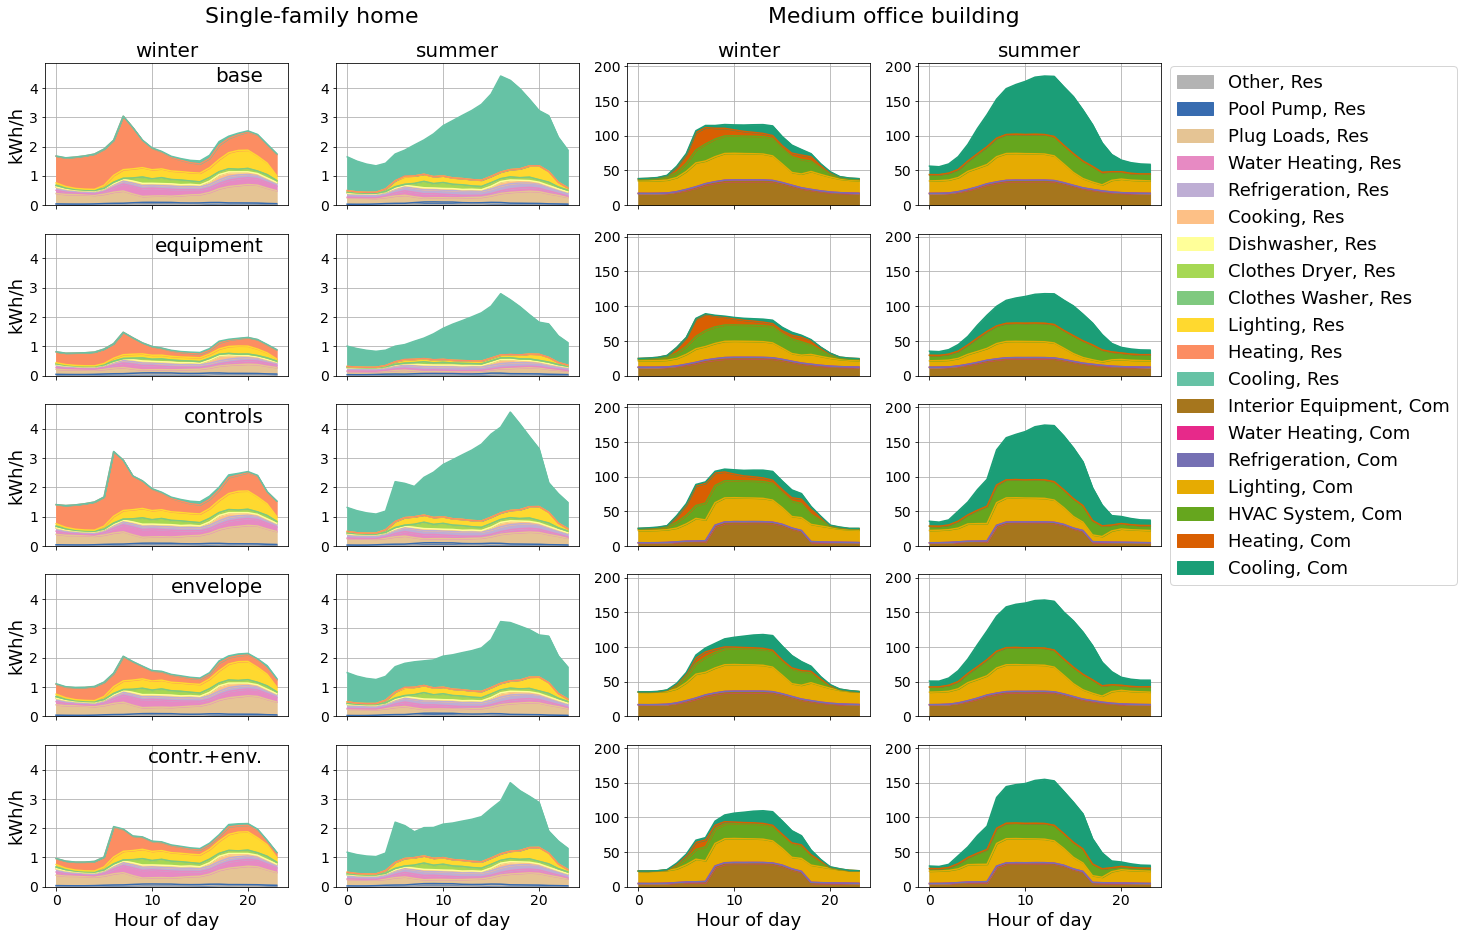

In [68]:
fig = plot_building_loads_by_season_upgrade(res_bldg_name, com_bldg_name, num_com_bldgs)

In [69]:
outdir=r'G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Reports, papers, and draft deliverables\Load interactions paper\Figures'
fig.savefig(os.path.join(outdir,'bldg_load_shapes.png'), facecolor='white', bbox_inches='tight')

USA_CA_Arcata.725945_2016-Single-Family_Detached_0-upgrade_0.csv
USA_CA_Bakersfield.Meadows.723840_2016-Single-Family_Detached_0-upgrade_0.csv
USA_CA_Barstow.Daggett.723815_2016-Single-Family_Detached_0-upgrade_0.csv
USA_CA_Fresno.Air.Terminal.723890_2016-Single-Family_Detached_0-upgrade_0.csv
USA_CA_Long.Beach.Lb.Airp.722970_2016-Single-Family_Detached_0-upgrade_0.csv
USA_CA_Los.Angeles.Intl.722950_2016-Single-Family_Detached_0-upgrade_0.csv
USA_CA_Sacramento.Executiv.724830_2016-Single-Family_Detached_0-upgrade_0.csv
USA_CA_San.Diego.Lindbergh.722900_2016-Single-Family_Detached_0-upgrade_0.csv
USA_CA_San.Francisco.Intl.724940_2016-Single-Family_Detached_0-upgrade_0.csv
USA_CA_Santa.Maria.Public.723940_2016-Single-Family_Detached_0-upgrade_0.csv
USA_NV_Reno.Cannon.Intl.724880_2016-Single-Family_Detached_0-upgrade_0.csv


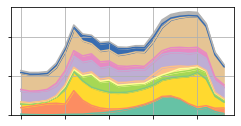

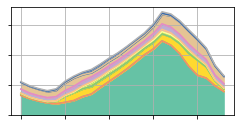

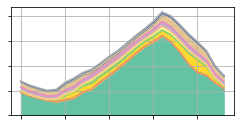

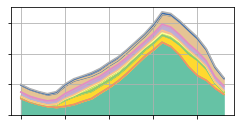

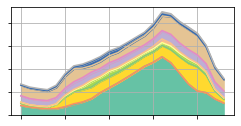

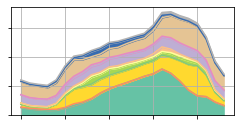

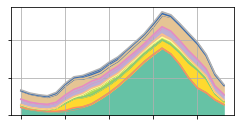

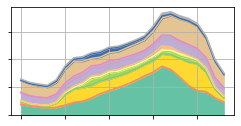

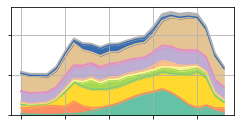

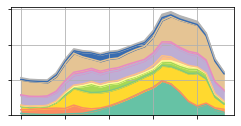

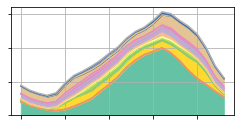

In [370]:
for f in os.listdir(indir_res):
    if (('USA_CA' in f) or ('USA_NV' in f)) and ('Single-Family_Detached' in f) and ('upgrade_0' in f):
        #We want to plot this one.
        print(f)
        fig, ax = plt.subplots(figsize=[4,2])
        res_lshp = map_columns(pd.read_csv(os.path.join(indir_res,f), index_col=0), col_map_res, map_to=2)
        res_eu_cols=res_lshp.columns.values
        res_avg_lshp = compute_average_loadshapes(pd.concat([caldat,res_lshp], axis='columns'), 
                                                  by='season', cols=res_eu_cols)
        res_avg_lshp.columns = pd.CategoricalIndex(
            c+', Res' if c in res_eu_cols else c for c in res_avg_lshp.columns],
            ordered=True,
            categories=list(palette_df['Display name'].values)[::-1]+['season','dhour'])
        res_eu_cols=[c+', Res' for c in res_eu_cols]
        
        sel = res_avg_lshp['season']==3
            
        res_plot_data = res_avg_lshp.loc[sel, ['dhour']+[c for c in palette_df['Display name'] if c in res_eu_cols]].set_index('dhour')

        res_plot_data.plot.area(
           ax=ax, grid=True, legend=False, 
            color=[palette[c] for c in res_plot_data.columns])
        #axs[j][i].set_axisbelow(True)
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        #fig.tight_layout()

In [346]:
map_columns(df, col_map_res, map_to=2)

Clothes Dryer  Clothes Washer  Cooling  Dishwasher   Heating  Lighting  \
0               0.0             0.0      0.0     0.00000  0.181203  0.042451   
1               0.0             0.0      0.0     0.00000  0.188124  0.025470   
2               0.0             0.0      0.0     0.00000  0.193075  0.016980   
3               0.0             0.0      0.0     0.00000  0.205120  0.016980   
4               0.0             0.0      0.0     0.00000  0.212870  0.018878   
...             ...             ...      ...         ...       ...       ...   
8779            0.0             0.0      0.0     0.19545  0.122636  0.331447   
8780            0.0             0.0      0.0     0.50639  0.125264  0.268377   
8781            0.0             0.0      0.0     0.00000  0.154904  0.201685   
8782            0.0             0.0      0.0     0.00000  0.073604  0.175182   
8783            0.0             0.0      0.0     0.00000  0.111129  0.085493   

       Cooking     Other  Plug Loads  Pool Pump  Refrigeration  Water Heating  
0     0.001949  0.021513    0.325960   0.001395       0.043861            0.0  
1     0.001949  0.019900    0.301513   0.001395       0.042764            0.0  
2     0.001114  0.019900    0.301513   0.001395       0.041668            0.0  
3     0.001114  0.019362    0.293364   0.001860       0.040571            0.0  
4     0.001949  0.017748    0.268917   0.003720       0.039475            0.0  
...        ...       ...         ...        ...            ...            ...  
8779  0.016708  0.061037    0.545983   0.003720       0.052633            0.0  
8780  0.009746  0.043187    0.578579   0.001860       0.051536            0.0  
8781  0.006962  0.037110    0.562281   0.001395       0.050440            0.0  
8782  0.004455  0.031732    0.480791   0.001395       0.048247            0.0  
8783  0.003063  0.026892    0.407450   0.001395       0.044957            0.0  

[8784 rows x 12 columns]

In [ ]:

{'Cooling,Com': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Cooling,Res': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'Heating,Com': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Heating,Res': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Lighting,Com': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'Lighting,Res': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Water Heating,Com': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'Water Heating,Res': (1.0, 0.596078431372549, 0.5882352941176471),
 'Appliances,Res': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Refrigeration,Com': (0.7725490196078432,
  0.6901960784313725,
  0.8352941176470589),
 'Interior Equipment,Com': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354),
 'Miscellaneous,Res': (0.7686274509803922,
  0.611764705882353,
  0.5803921568627451),
 'HVAC System,Com': (0.8901960784313725,
  0.4666666666666667,
  0.7607843137254902),
 'other_load': (0.9686274509803922,
  0.7137254901960784,
  0.8235294117647058)}

In [13]:
list(sns.color_palette('cubehelix',20))

[(0.06700757826411259, 0.030125538823454635, 0.08347751484971086),
 (0.09998352692085306, 0.07565501051639596, 0.17714719988612818),
 (0.10231025194333628, 0.13952898866828906, 0.2560120319409181),
 (0.0892365585509959, 0.21757338956148978, 0.3008726640446374),
 (0.08238093761150347, 0.3001473774053336, 0.3044796804920607),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.17004232121057958, 0.43679759647517286, 0.22372555555555548),
 (0.2755448951809807, 0.46939062099288875, 0.18898170995777125),
 (0.4106130272672762, 0.48044780541672255, 0.1891154277778484),
 (0.5544409136511972, 0.47789796625667885, 0.2383424026313099),
 (0.6926126323626934, 0.47363229044531197, 0.3478492710523138),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.8276276653823276, 0.5103678256815796, 0.6382069084720281),
 (0.8299576787894204, 0.5632024035248271, 0.7762744444444445),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.771147220055902, 0.728589116

In [14]:
sns.color_palette('cubehelix',20)

[(0.06700757826411259, 0.030125538823454635, 0.08347751484971086),
 (0.09998352692085306, 0.07565501051639596, 0.17714719988612818),
 (0.10231025194333628, 0.13952898866828906, 0.2560120319409181),
 (0.0892365585509959, 0.21757338956148978, 0.3008726640446374),
 (0.08238093761150347, 0.3001473774053336, 0.3044796804920607),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.17004232121057958, 0.43679759647517286, 0.22372555555555548),
 (0.2755448951809807, 0.46939062099288875, 0.18898170995777125),
 (0.4106130272672762, 0.48044780541672255, 0.1891154277778484),
 (0.5544409136511972, 0.47789796625667885, 0.2383424026313099),
 (0.6926126323626934, 0.47363229044531197, 0.3478492710523138),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.8276276653823276, 0.5103678256815796, 0.6382069084720281),
 (0.8299576787894204, 0.5632024035248271, 0.7762744444444445),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.771147220055902, 0.7285891160099365, 0.9408568827998472),
 (0.7581010612365786, 0.8123776332007712, 0.9548328907488411),
 (0.7775608374378459, 0.8840392521212448, 0.9452007992345052),
 (0.8325954670187771, 0.9375724007447074, 0.9357812487297815),
 (0.9133623038576015, 0.9737257184842087, 0.9494024269915201)]

In [25]:
sns.color_palette("Set2", 8)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [255]:
[mc.to_hex(t) for t in sns.color_palette("Set2")[:]]

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

In [26]:
sns.color_palette("Accent", 8)

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4)]

In [31]:
[mc.to_hex(t) for t in sns.color_palette("Accent")[:-1]]

['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']

In [27]:
sns.color_palette("Dark2")

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [34]:
[mc.to_hex(t) for t in sns.color_palette("Dark2")[:-1]]

['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d']